In [3]:
import numpy as np
#import fft


301


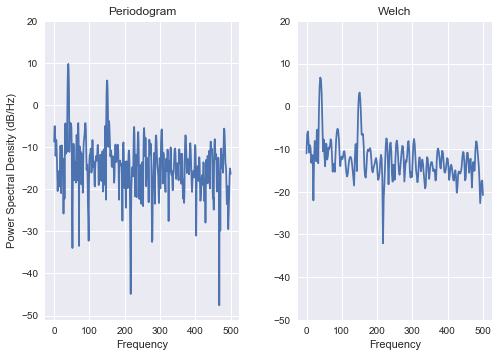

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

fs = 1000
t = np.linspace(0, 0.3, 301)
A = np.array([5, 8]).reshape(-1, 1)
f = np.array([150, 40]).reshape(-1, 1)
xn = (A * np.sin(2 * np.pi * f * t)).sum(axis=0) + 5 * np.random.randn(*t.shape)
print(xn.size)
yticks = np.arange(-50, 30, 10)
xticks = np.arange(0,550,100)
plt.subplots_adjust(hspace=0.45, wspace=0.3)
plt.subplot(1,2,1)
plt.psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,
    scale_by_freq=True)
plt.title('Periodogram')
plt.yticks(yticks)
plt.xticks(xticks)
plt.grid(True)

plt.subplot(1,2,2)
plt.psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, noverlap=75, pad_to=512,
    scale_by_freq=True)
plt.title('Welch')
plt.xticks(xticks)
plt.yticks(yticks)
plt.ylabel('')
plt.grid(True)
plt.show()

In [51]:
from matplotlib.mlab import psd 
psdensity,freq=psd(xn, NFFT=301, Fs=fs, window=mlab.window_none, pad_to=1024,scale_by_freq=True)

psd2,freq2=psd(xn, NFFT=150, Fs=fs, window=mlab.window_none, noverlap=75, pad_to=512,scale_by_freq=True)

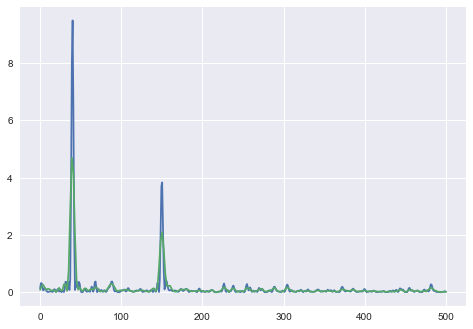

In [52]:
plt.plot(freq,psdensity)
plt.plot(freq2,psd2)
plt.show()

In [33]:
xn.size,t

(301, array([ 0.   ,  0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,
         0.008,  0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,
         0.016,  0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,
         0.024,  0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,
         0.032,  0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,
         0.04 ,  0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,
         0.048,  0.049,  0.05 ,  0.051,  0.052,  0.053,  0.054,  0.055,
         0.056,  0.057,  0.058,  0.059,  0.06 ,  0.061,  0.062,  0.063,
         0.064,  0.065,  0.066,  0.067,  0.068,  0.069,  0.07 ,  0.071,
         0.072,  0.073,  0.074,  0.075,  0.076,  0.077,  0.078,  0.079,
         0.08 ,  0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,
         0.088,  0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,
         0.096,  0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,
         0.104,  0.105,  0.106,  0.107,  0.108,  0.109,  0.

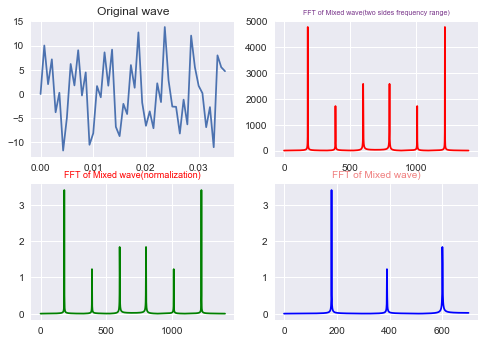

In [5]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn


#采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率为1400赫兹（即一秒内有1400个采样点，一样意思的）
x=np.linspace(0,1,1400)      

#设置需要采样的信号，频率分量有180，390和600
y=7*np.sin(2*np.pi*180*x) + 2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)

yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分

yf=abs(fft(y))                # 取绝对值
yf1=abs(fft(y))/len(x)           #归一化处理
yf2 = yf1[range(int(len(x)/2))]  #由于对称性，只取一半区间

xf = np.arange(len(y))        # 频率
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #取一半区间


plt.subplot(221)
plt.plot(x[0:50],y[0:50])   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()

In [34]:
x[0],x[-1],len(x),x

(0.0,
 1.0,
 1400,
 array([  0.00000000e+00,   7.14796283e-04,   1.42959257e-03, ...,
          9.98570407e-01,   9.99285204e-01,   1.00000000e+00]))

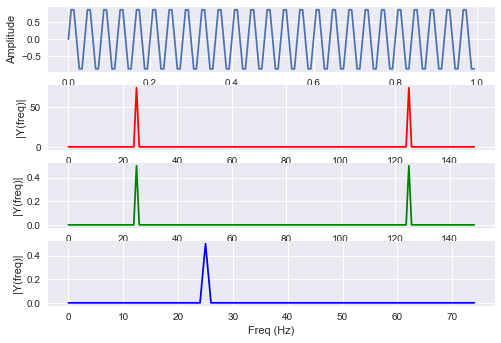

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn



Fs = 150.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长

ff = 25;                    # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y)                  # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(y)          # 未归一化
Y = np.fft.fft(y)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

fig, ax = plt.subplots(4, 1)

ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(frq,abs(YY),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

ax[2].plot(frq,abs(Y),'G')  # plotting the spectrum
ax[2].set_xlabel('Freq (Hz)')
ax[2].set_ylabel('|Y(freq)|')

ax[3].plot(frq1,abs(Y1),'B') # plotting the spectrum
ax[3].set_xlabel('Freq (Hz)')
ax[3].set_ylabel('|Y(freq)|')

plt.show()